In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df["X1"] = [1,2,3,4,5,6,6,7,9,9]
df["X2"] = [5,3,6,8,1,9,5,8,9,2]
df["label"] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

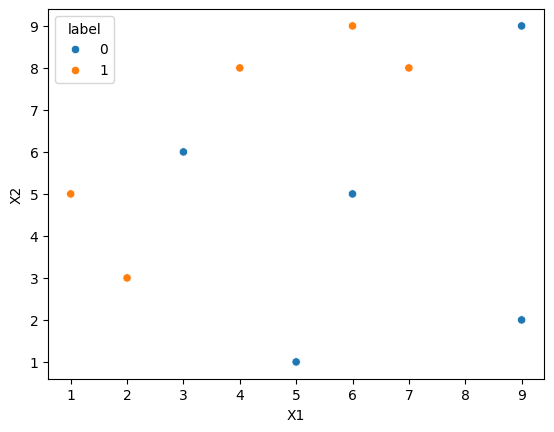

In [5]:
import seaborn as sns
sns.scatterplot(x=df["X1"], y=df["X2"], hue=df["label"])

# Step 1 - Assign Weights

In [7]:
# Initially assign weights to every row
df["weights"] = 1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


# Step 2 - Train 1st Model

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1 = DecisionTreeClassifier(max_depth=1) # max depth = 1 becuase in AdaBosst we Decision Stumps

In [12]:
X = df.iloc[:,0:2].values # to convert dataframe into numpy array
y = df.iloc[:,2].values # to convert series into numpy array

In [13]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

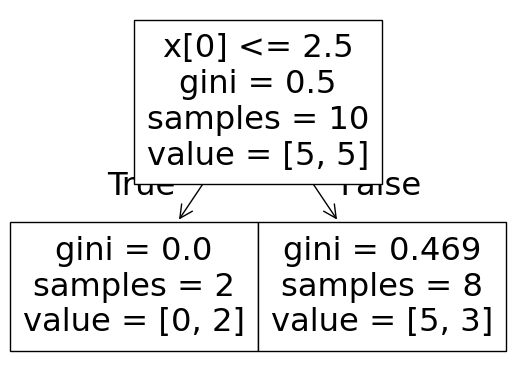

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

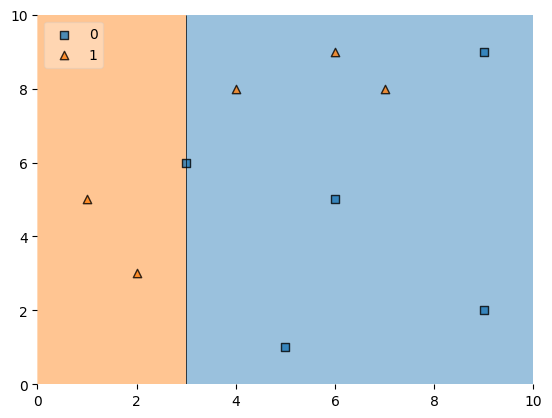

In [15]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [16]:
df["predict"] = dt1.predict(X)

In [17]:
df

,X1,X2,label,weights,predict
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


# Step 3

In [19]:
# To Calculate Error Weight
def calculate_model_weight(error):
    return 0.5 * np.log((1-error)/error)

In [20]:
alpha1 = calculate_model_weight(0.3) # becuase our our 1st model made 3 mistakes(miss-classification) so we add weight of these rows which is for now 0.+0.1+0.1 = 0.3
alpha1

0.42364893019360184

# Step 4 - Update Weights

In [22]:
def update_row_weights(row,alpha=0.424):
    if row["label"] == row["predict"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

In [23]:
df["updated_weights"] = df.apply(update_row_weights, axis=1)

In [24]:
df

,X1,X2,label,weights,predict,updated_weights
0,1,5,1,0.1,1,0.065442
1,2,3,1,0.1,1,0.065442
2,3,6,0,0.1,0,0.065442
3,4,8,1,0.1,0,0.152806
4,5,1,0,0.1,0,0.065442
5,6,9,1,0.1,0,0.152806
6,6,5,0,0.1,0,0.065442
7,7,8,1,0.1,0,0.152806
8,9,9,0,0.1,0,0.065442
9,9,2,0,0.1,0,0.065442


In [25]:
df["updated_weights"].sum() # It is kept in mind when updating weight the sum of all the weights must be equal to 1 if not then do normalize

0.9165151954714182

In [26]:
df["normalized_weights"] = df["updated_weights"]/df["updated_weights"].sum()

In [27]:
df

,X1,X2,label,weights,predict,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065442,0.071403
1,2,3,1,0.1,1,0.065442,0.071403
2,3,6,0,0.1,0,0.065442,0.071403
3,4,8,1,0.1,0,0.152806,0.166725
4,5,1,0,0.1,0,0.065442,0.071403
5,6,9,1,0.1,0,0.152806,0.166725
6,6,5,0,0.1,0,0.065442,0.071403
7,7,8,1,0.1,0,0.152806,0.166725
8,9,9,0,0.1,0,0.065442,0.071403
9,9,2,0,0.1,0,0.065442,0.071403


In [28]:
df["normalized_weights"].sum()

1.0000000000000002

In [29]:
# Upper Range
df["cumsum_upper"] = np.cumsum(df["normalized_weights"])

In [30]:
# Lower Range
df["cumsum_lower"] = df["cumsum_upper"] - df["normalized_weights"]

In [31]:
df[["X1", "X2", "label", "weights","predict", "updated_weights", "normalized_weights", "cumsum_lower", "cumsum_upper"]]

,X1,X2,label,weights,predict,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065442,0.071403,0.000000,0.071403
1,2,3,1,0.1,1,0.065442,0.071403,0.071403,0.142807
2,3,6,0,0.1,0,0.065442,0.071403,0.142807,0.214210
3,4,8,1,0.1,0,0.152806,0.166725,0.214210,0.380936
4,5,1,0,0.1,0,0.065442,0.071403,0.380936,0.452339
5,6,9,1,0.1,0,0.152806,0.166725,0.452339,0.619064
6,6,5,0,0.1,0,0.065442,0.071403,0.619064,0.690468
7,7,8,1,0.1,0,0.152806,0.166725,0.690468,0.857193
8,9,9,0,0.1,0,0.065442,0.071403,0.857193,0.928597
9,9,2,0,0.1,0,0.065442,0.071403,0.928597,1.000000


# Step 5 - Up Sampling

In [33]:
def create_new_df(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row["cumsum_upper"]  > a and a > row["cumsum_lower"]:
                indices.append(index)
    return indices

In [34]:
index_values = create_new_df(df)

In [35]:
index_values

[7, 0, 6, 5, 2, 6, 6, 3, 5, 5]

In [36]:
second_df = df.iloc[index_values, [0,1,2,3]]
second_df

,X1,X2,label,weights
7,7,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [37]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [38]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [39]:
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

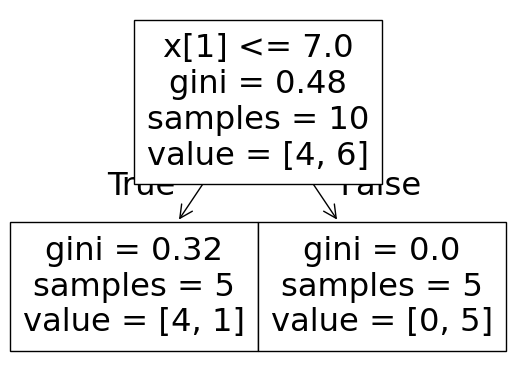

In [40]:
plot_tree(dt2)

<Axes: >

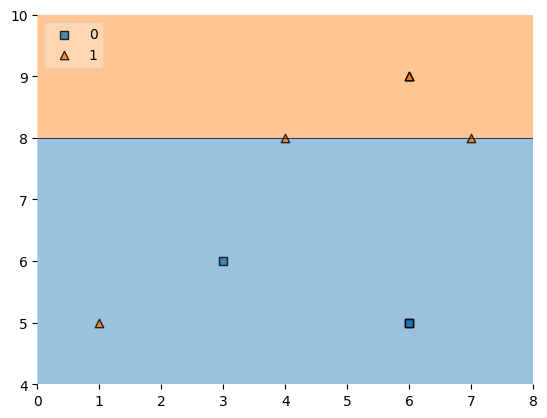

In [41]:
plot_decision_regions(X,y, clf=dt2, legend=2)

In [42]:
second_df["predict"] = dt2.predict(X)

In [43]:
second_df

,X1,X2,label,weights,predict
7,7,8,1,0.1,1
0,1,5,1,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [44]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [45]:
def update_row_weights(row,alpha=1.099):
    if row["label"] == row["predict"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

In [46]:
second_df["updated_weights"] = second_df.apply(update_row_weights, axis=1)

In [47]:
second_df["updated_weights"].sum()

0.6000000450960237

In [48]:
second_df["normalized_weights"] = second_df["updated_weights"]/second_df["updated_weights"].sum()

In [49]:
second_df

,X1,X2,label,weights,predict,updated_weights,normalized_weights
7,7,8,1,0.1,1,0.033320,0.055534
0,1,5,1,0.1,0,0.300116,0.500194
6,6,5,0,0.1,0,0.033320,0.055534
5,6,9,1,0.1,1,0.033320,0.055534
2,3,6,0,0.1,0,0.033320,0.055534
6,6,5,0,0.1,0,0.033320,0.055534
6,6,5,0,0.1,0,0.033320,0.055534
3,4,8,1,0.1,1,0.033320,0.055534
5,6,9,1,0.1,1,0.033320,0.055534
5,6,9,1,0.1,1,0.033320,0.055534


In [50]:
second_df["normalized_weights"].sum()

1.0

In [51]:
second_df["cumsum_upper"] = np.cumsum(second_df["normalized_weights"])

In [52]:
second_df["cumsum_lower"] = second_df["cumsum_upper"] - second_df["normalized_weights"]

In [53]:
second_df[["X1", "X2", "label", "weights","predict", "updated_weights", "normalized_weights", "cumsum_lower", "cumsum_upper"]]

,X1,X2,label,weights,predict,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
7,7,8,1,0.1,1,0.033320,0.055534,0.000000,0.055534
0,1,5,1,0.1,0,0.300116,0.500194,0.055534,0.555728
6,6,5,0,0.1,0,0.033320,0.055534,0.555728,0.611262
5,6,9,1,0.1,1,0.033320,0.055534,0.611262,0.666796
2,3,6,0,0.1,0,0.033320,0.055534,0.666796,0.722330
6,6,5,0,0.1,0,0.033320,0.055534,0.722330,0.777864
6,6,5,0,0.1,0,0.033320,0.055534,0.777864,0.833398
3,4,8,1,0.1,1,0.033320,0.055534,0.833398,0.888932
5,6,9,1,0.1,1,0.033320,0.055534,0.888932,0.944466
5,6,9,1,0.1,1,0.033320,0.055534,0.944466,1.000000


In [54]:
index_values = create_new_df(second_df)

In [55]:
index_values

[3, 0, 6, 0, 0, 3, 0, 0, 0, 0]

In [56]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
5,6,9,1,0.1
7,7,8,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1


In [57]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [58]:
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [59]:
dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.625, 0.5, '  False')]

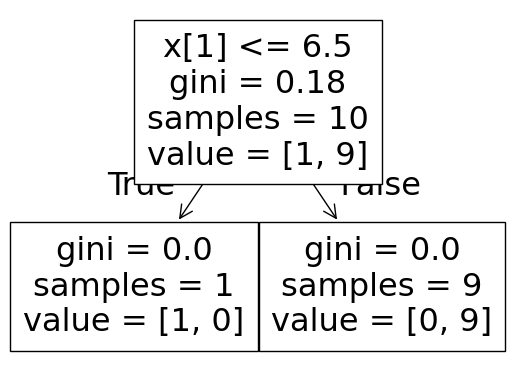

In [60]:
plot_tree(dt3)

<Axes: >

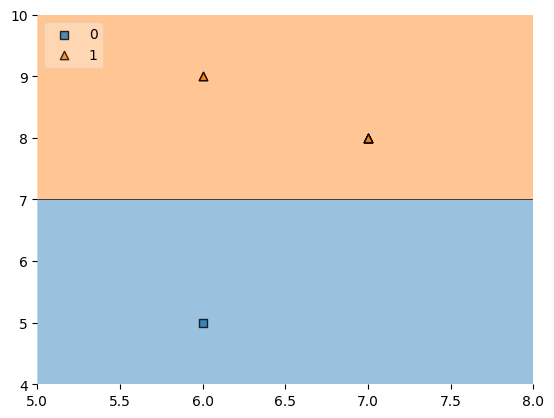

In [61]:
plot_decision_regions(X,y, clf=dt3, legend=2)

In [62]:
third_df["predict"] = dt3.predict(X)

In [63]:
third_df

,X1,X2,label,weights,predict
5,6,9,1,0.1,1
7,7,8,1,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
5,6,9,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1


In [64]:
alpha3 = calculate_model_weight(0.2)
alpha3

0.6931471805599453

In [65]:
def update_row_weights(row,alpha=0.693):
    if row["label"] == row["predict"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

In [66]:
third_df["updated_weights"] = third_df.apply(update_row_weights, axis=1)
third_df

,X1,X2,label,weights,predict,updated_weights
5,6,9,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
6,6,5,0,0.1,0,0.050007
7,7,8,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
5,6,9,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007
7,7,8,1,0.1,1,0.050007


In [67]:
third_df["updated_weights"].sum()

0.5000735956957678

In [68]:
third_df["normalized_weights"] = third_df["updated_weights"]/third_df["updated_weights"].sum()
third_df

,X1,X2,label,weights,predict,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
6,6,5,0,0.1,0,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
5,6,9,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1
7,7,8,1,0.1,1,0.050007,0.1


In [69]:
third_df["normalized_weights"].sum()

0.9999999999999999

In [70]:
third_df["cumsum_upper"] = np.cumsum(third_df["normalized_weights"])

In [71]:
third_df["cumsum_lower"] = third_df["cumsum_upper"] - third_df["normalized_weights"]

In [72]:
third_df

,X1,X2,label,weights,predict,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
5,6,9,1,0.1,1,0.050007,0.1,0.1,0.0
7,7,8,1,0.1,1,0.050007,0.1,0.2,0.1
6,6,5,0,0.1,0,0.050007,0.1,0.3,0.2
7,7,8,1,0.1,1,0.050007,0.1,0.4,0.3
7,7,8,1,0.1,1,0.050007,0.1,0.5,0.4
5,6,9,1,0.1,1,0.050007,0.1,0.6,0.5
7,7,8,1,0.1,1,0.050007,0.1,0.7,0.6
7,7,8,1,0.1,1,0.050007,0.1,0.8,0.7
7,7,8,1,0.1,1,0.050007,0.1,0.9,0.8
7,7,8,1,0.1,1,0.050007,0.1,1.0,0.9


In [73]:
third_df[["X1", "X2", "label", "weights","predict", "updated_weights", "normalized_weights", "cumsum_lower", "cumsum_upper"]]

,X1,X2,label,weights,predict,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.050007,0.1,0.0,0.1
7,7,8,1,0.1,1,0.050007,0.1,0.1,0.2
6,6,5,0,0.1,0,0.050007,0.1,0.2,0.3
7,7,8,1,0.1,1,0.050007,0.1,0.3,0.4
7,7,8,1,0.1,1,0.050007,0.1,0.4,0.5
5,6,9,1,0.1,1,0.050007,0.1,0.5,0.6
7,7,8,1,0.1,1,0.050007,0.1,0.6,0.7
7,7,8,1,0.1,1,0.050007,0.1,0.7,0.8
7,7,8,1,0.1,1,0.050007,0.1,0.8,0.9
7,7,8,1,0.1,1,0.050007,0.1,0.9,1.0


In [74]:
index_values = create_new_df(third_df)

In [75]:
index_values

[6, 7, 7, 5, 7, 7, 7, 7, 7, 5]

In [76]:
print(f"'alpha1': {alpha1}, 'alpha2': {alpha2}, 'alpha3': {alpha3}")

'alpha1': 0.42364893019360184, 'alpha2': 1.0986122886681098, 'alpha3': 0.6931471805599453


# Prediction

In [78]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [79]:
dt2.predict(query)

array([0], dtype=int64)

In [80]:
dt3.predict(query)

array([0], dtype=int64)

In [184]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1) # In boosting 0 will be -1alpha1*1 + alpha2*(-1) + alpha3*(-1) # In boosting 0 will be -1

-1.3681105390344532

In [186]:
np.sign(2.215)

1.0

In [188]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0], dtype=int64)

In [190]:
dt2.predict(query)

array([1], dtype=int64)

In [192]:
dt3.predict(query)

array([1], dtype=int64)

In [194]:
alpha1*(-1) + alpha2*(1) + alpha3*(1) # In boosting 0 will be -1

1.3681105390344532

In [196]:
np.sign(1.368)

1.0